<a href="https://colab.research.google.com/github/Akash-mahandargi/PCA/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("/content/adult_with_headers.csv")

# Preview first few rows
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Step 2: Overview of dataset
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nBasic summary statistics (numerical only):\n")
print(df.describe())


Shape of dataset: (32561, 15)

Column names:
 ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

Data types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Basic summary statistics (numerical only):

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085  

In [4]:
import numpy as np

# Step 3: Replace '?' with NaN (missing values)
df.replace('?', np.nan, inplace=True)

# Check missing values column-wise
missing = df.isnull().sum()
print("Missing values in each column:\n")
print(missing[missing > 0])


Missing values in each column:

Series([], dtype: int64)


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm all missing values handled
print("\nMissing values after cleaning:")
print(df.isnull().sum().sum())



Missing values after cleaning:
0


In [6]:
# Step 4: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Show cleaned column names
print("Cleaned column names:\n", df.columns.tolist())


Cleaned column names:
 ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [17]:
# Step 5: Encode the target column
df['income'] = df['income'].astype(str).str.strip().map({'<=50K': 0, '>50K': 1})

# Confirm the change
print(df['income'].value_counts())

Series([], Name: count, dtype: int64)


In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 6: Label encode all object (categorical) columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # save encoder for possible inverse transform
    print(f"Encoded {col}")


Encoded workclass
Encoded education
Encoded marital_status
Encoded occupation
Encoded relationship
Encoded race
Encoded sex
Encoded native_country


In [10]:
df.shape

(32561, 15)

In [11]:
print(df['age'].unique())
print(df['income'].unique())


[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[nan]


In [20]:
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,NaN
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,NaN
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,NaN
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,NaN
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,NaN


In [21]:
print(df.columns)



Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [22]:
df[['age', 'income']].isnull().sum()

,0
age,0
income,32561


In [23]:
df = df.dropna(subset=['age', 'income'])


In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/adult_with_headers.csv')

# Replace "?" with NaN and drop missing rows
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Convert 'age' to numeric (if needed)
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [26]:
print(df['age'].isnull().sum())
print(df['age'].describe())

0
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


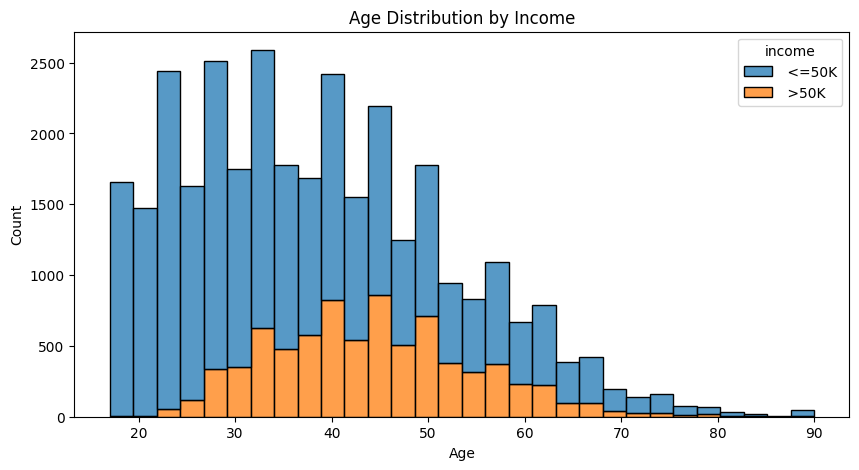

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='income', multiple='stack', bins=30)
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


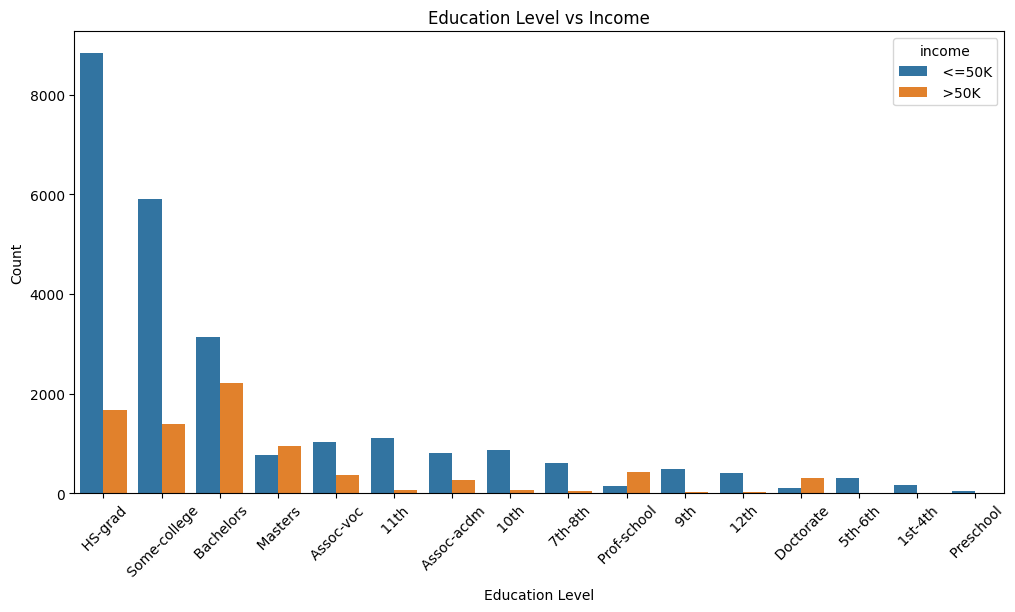

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.title('Education Level vs Income')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()



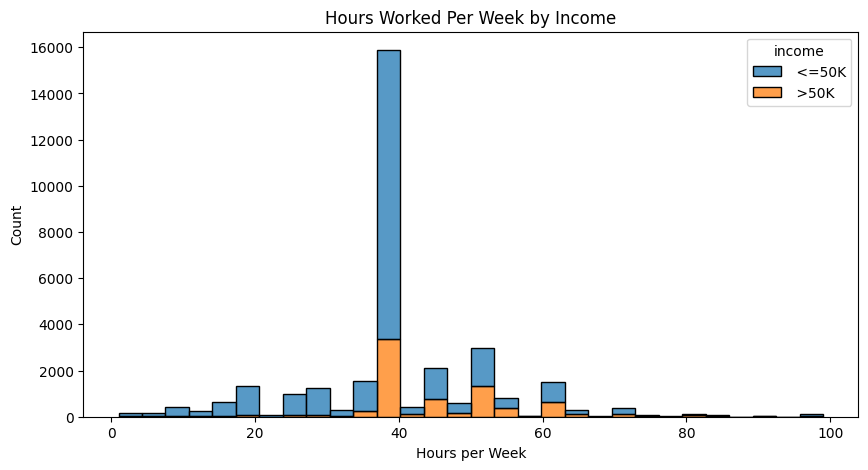

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hours_per_week', hue='income', multiple='stack', bins=30)
plt.title('Hours Worked Per Week by Income')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()



In [31]:
print(df_scaled.columns)
print(df_scaled.dtypes)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [41]:
from sklearn.preprocessing import StandardScaler

# Create a copy for scaling
df_scaled = df.copy()

# Define numeric columns excluding 'income' safely
numerical_cols = [col for col in df_scaled.select_dtypes(include=['int64', 'float64']).columns if col != 'income']

# Apply StandardScaler
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Confirm result
df_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [34]:
df_scaled.dtypes


,0
age,float64
workclass,object
fnlwgt,float64
education,object
education_num,float64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [35]:
df_corr = df_scaled.select_dtypes(include=['int64', 'float64'])


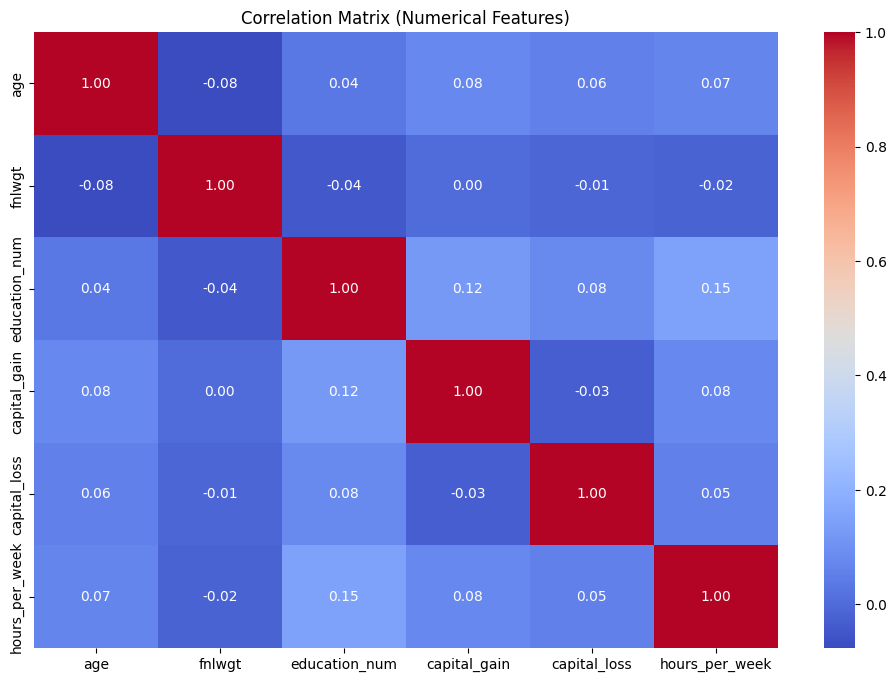

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
correlation = df_corr.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [43]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Label encode all object (categorical) columns in X
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # save encoder for possible inverse transform
    print(f"Encoded {col}")

# Identify discrete features (all features in X are now discrete after label encoding)
discrete_features = [True] * X.shape[1]

# Compute Mutual Information scores
# We need to tell mutual_info_classif which features are discrete
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42)

# Create a DataFrame for easy viewing
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Display top 10 important features
display(mi_df.head(10))

Encoded workclass
Encoded education
Encoded marital_status
Encoded occupation
Encoded relationship
Encoded race
Encoded sex
Encoded native_country


,Feature,MI Score
2,fnlwgt,0.393714
7,relationship,0.114623
5,marital_status,0.108497
10,capital_gain,0.083382
0,age,0.068773
3,education,0.064872
4,education_num,0.064872
6,occupation,0.064409
12,hours_per_week,0.042283
11,capital_loss,0.036980


In [44]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_scaled.drop('income', axis=1)
y = df_scaled['income']

# Split data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (26048, 14), Test shape: (6513, 14)


In [49]:
# Check for non-numeric columns in X
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [50]:
X = X.select_dtypes(include=['int64', 'float64'])


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [53]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=1000)

# Train it
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[4676  266]
 [ 927  644]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      4942
        >50K       0.71      0.41      0.52      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.68      0.70      6513
weighted avg       0.80      0.82      0.80      6513

Accuracy Score: 0.8168278826961461
